class1
VOIP             2826
BROWSING         2500
VPN-BROWSING     2500
VPN-VOIP         2271
VPN-FT           1932
VPN-CHAT         1196
FT               1018
P2P              1000
VPN-P2P           928
CHAT              890
VPN-MAIL          491
STREAMING         482
VPN-STREAMING     475
MAIL              249
Name: count, dtype: int64

Shape (rows, columns): (18758, 24)

Duplicates: 684

Duplicates after cleaning: 0

Number of rows: 18074
Rows after reload: 18074

{'BROWSING': 0, 'CHAT': 1, 'FT': 2, 'MAIL': 3, 'P2P': 4, 'STREAMING': 5, 'VOIP': 6, 'VPN-BROWSING': 7, 'VPN-CHAT': 8, 'VPN-FT': 9, 'VPN-MAIL': 10, 'VPN-P2P': 11, 'VPN-STREAMING': 12, 'VPN-VOIP': 13}

KNN Model Accuracy: 70.88%



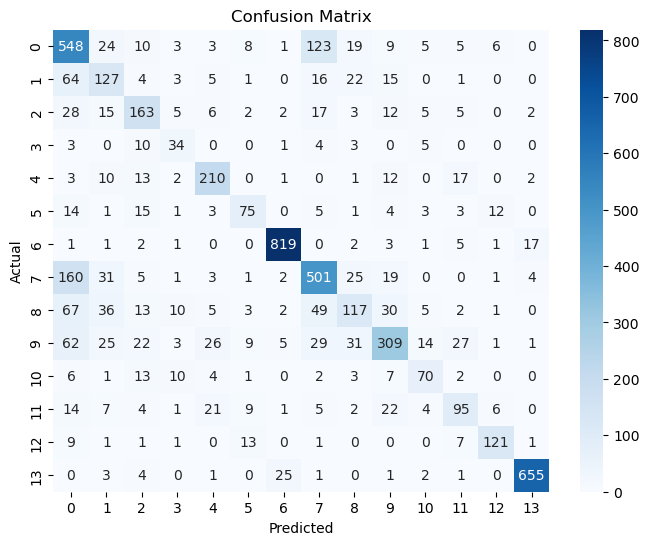

              precision    recall  f1-score      support
0              0.559755  0.717277  0.628801   764.000000
1              0.450355  0.492248  0.470370   258.000000
2              0.584229  0.615094  0.599265   265.000000
3              0.453333  0.566667  0.503704    60.000000
4              0.731707  0.774908  0.752688   271.000000
5              0.614754  0.547445  0.579151   137.000000
6              0.953434  0.960141  0.956776   853.000000
7              0.665339  0.665339  0.665339   753.000000
8              0.510917  0.344118  0.411248   340.000000
9              0.697517  0.547872  0.613704   564.000000
10             0.614035  0.588235  0.600858   119.000000
11             0.558824  0.497382  0.526316   191.000000
12             0.812081  0.780645  0.796053   155.000000
13             0.960411  0.945166  0.952727   693.000000
accuracy       0.708833  0.708833  0.708833     0.708833
macro avg      0.654764  0.645896  0.646928  5423.000000
weighted avg   0.711970  0.7088

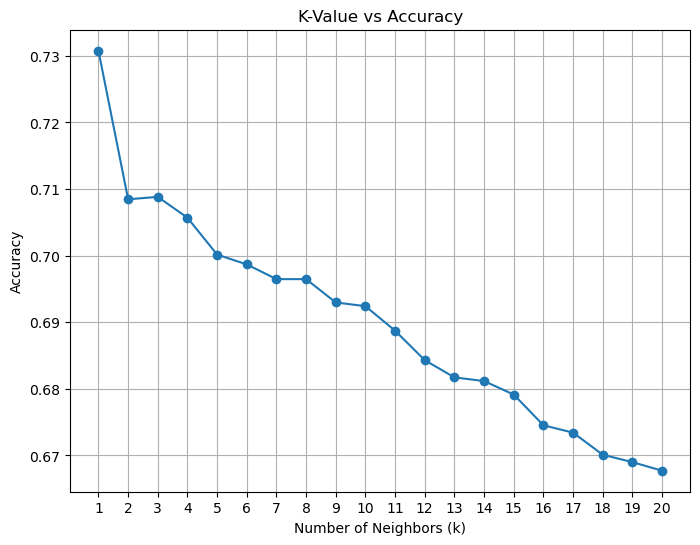

In [6]:
import pandas as pd


# Load the CSV file
df = pd.read_csv('dataset2.csv')  # change the name if your file is different

print(df['class1'].value_counts())  # or whatever your class column is
print()
print('Shape (rows, columns):', df.shape)
print()
print('Duplicates:', df.duplicated().sum())

df = df.drop_duplicates()
print()
print('Duplicates after cleaning:', df.duplicated().sum())
print()
print('Number of rows:', len(df))

#df.to_csv('dataset2_cleaned.csv', index=False)

df_cleaned = pd.read_csv('dataset2_cleaned.csv')
print('Rows after reload:', len(df_cleaned))

print()
from sklearn.preprocessing import LabelEncoder
##converting categorical labels into number##
le = LabelEncoder()
df['class1'] = le.fit_transform(df['class1'])
print(dict(zip(le.classes_, le.transform(le.classes_))))

print()
## SPLIT DATASETS
# X = input/features (all columns except Label)
# y = output/class (Label column)
X = df.drop('class1', axis=1)
y = df['class1']

# Split into train (70%) and test (30%)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Step 1: Create the model
knn = KNeighborsClassifier(n_neighbors=3)  # You can change k (e.g., 5 or 7) to test different values

# Step 2: Train the model
knn.fit(X_train, y_train)

# Step 3: Predict on test data
y_pred = knn.predict(X_test)

# Step 4: Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"KNN Model Accuracy: {accuracy * 100:.2f}%")

print()

import matplotlib.pyplot as plt
import seaborn as sns

## Class distribution
#plt.figure(figsize=(10,6))
#sns.countplot(x=y, order=y.value_counts().index)
#plt.title('Traffic Class Distribution')
#plt.xlabel('Traffic Class')
#plt.ylabel('Count')
#plt.xticks(rotation=45)
#plt.show()

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# y_test = true labels
# y_pred = model's predicted labels

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred, output_dict=True)

# To display nicely:
import pandas as pd

report_df = pd.DataFrame(report).transpose()
print(report_df)

k_values = list(range(1, 21))  # Try k=1 to k=20
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_k = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred_k)
    accuracies.append(acc)

plt.figure(figsize=(8,6))
plt.plot(k_values, accuracies, marker='o')
plt.title('K-Value vs Accuracy')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

